## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Importing the dataset

In [ ]:
dataset_te = pd.read_csv('/content/drive/MyDrive/SVD_Specific_90_test.csv')
dataset_tr = pd.read_csv('/content/drive/MyDrive/SVD_Specific_90_train.csv')
dataset=pd.read_csv("/content/drive/MyDrive/SVD_Specific_90_all.csv")


#balancing

In [ ]:
def BalancingDataset(dataset)
  import pandas as pd
  from sklearn.utils import resample

  df_balanced = pd.DataFrame()
  a=dataset
  min_samples = a["label"].value_counts().min()
  for label in a["label"].unique():
      df_class = a[a["label"] == label]
      if label=="Healthy":
        df_class_downsampled = resample(df_class,
                                      replace=False,  # sample without replacement
                                      n_samples=150,  # to match the minority class
                                      random_state=42)  # reproducible results
      else:
        df_class_downsampled = resample(df_class,
                                      replace=False,  # sample without replacement
                                      n_samples=len(df_class),  # to match the minority class
                                      random_state=42)
      df_balanced = pd.concat([df_balanced, df_class_downsampled])

  # Shuffle the dataset
  df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
  dataset=df_balanced
  # Verify the class distribution in the balanced dataset
  print(df_balanced_t["label"].value_counts())

label
Healthy                        150
Rekurrensparese                143
Hyperfunktionelle Dysphonie    114
Laryngitis                      52
Funktionelle Dysphonie          47
Dysphonie                       44
Spasmodische Dysphonie          36
Psychogene Dysphonie            36
Name: count, dtype: int64

#X,Y

In [ ]:
X_train=dataset_tr.iloc[:,3:].values
y_train=dataset_tr.iloc[:,1].values

X_test=dataset_te.iloc[:,3:].values
y_test=dataset_te.iloc[:,1].values

In [ ]:
X = dataset.iloc[:,3:].values
y = dataset.iloc[:,1].values

In [ ]:
X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape,

NameError: name 'X' is not defined

# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.25,random_state=42 )

NameError: name 'X' is not defined

# label encoder

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [ ]:
le.classes_


array(['Dysphonia', 'Functional Dysphonia', 'Healthy',
       'Hyperfunctional dysphonia', 'Laryngitis', 'Psychogenic Dysphonia',
       'Recurrent Laryngeal Nerve Paralysis', 'Spasmodic Dysphonia'],
      dtype=object)

In [ ]:
len(le.classes_)

8

# Feature Scaling

In [ ]:
def Scaling(X_train,X_test):
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test=sc.transform(X_test)
  return(X_train,X_test)

In [ ]:
X_train,X_test=Scaling(X_train,X_test)

##finding best dims

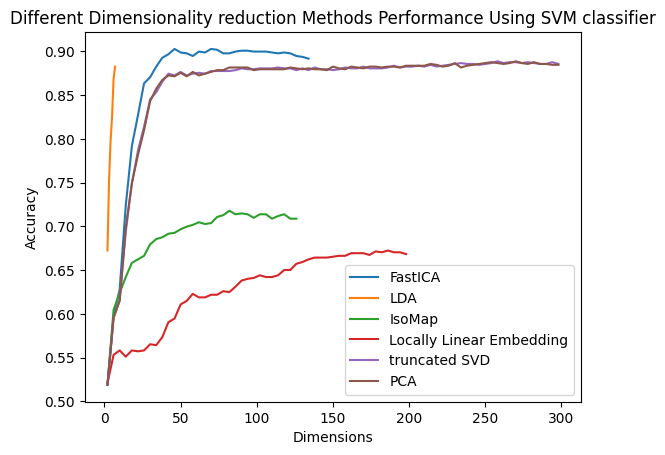

In [ ]:
plt.plot(list(acc_5.keys()),list(acc_5.values()),label="FastICA")
plt.plot(list(acc_4.keys()),list(acc_4.values()),label="LDA")
plt.plot(list(acc_3.keys()),list(acc_3.values()),label="IsoMap")
plt.plot(list(acc_2.keys()),list(acc_2.values()),label="Locally Linear Embedding")
plt.plot(list(acc_1.keys()),list(acc_1.values()),label="truncated SVD")
plt.plot(list(acc.keys()),list(acc.values()),label="PCA")
plt.legend()
plt.title("Different Dimensionality reduction Methods Performance Using SVM classifier")
plt.xlabel("Dimensions")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
max(acc_1,key=acc_1.get),acc_1[max(acc_1,key=acc_1.get)]

(67, 0.9039433771486349)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
acc_1={}
for i in range(2,100,1):
  ica = FastICA(n_components=i, random_state=42)
  X_train_t = ica.fit_transform(X_train)
  X_test_t=ica.transform(X_test)
  from sklearn.svm import SVC
  classifier = SVC(kernel ="rbf"  )
  classifier.fit(X_train_t, y_train)
  from sklearn.metrics import confusion_matrix, accuracy_score
  y_pred=classifier.predict(X_test_t)
  acc_1[i]=accuracy_score(y_test, y_pred)
  print(acc_1[i])
plt.plot(list(acc_1.keys()),list(acc_1.values()))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.5187057633973711


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.5146612740141557


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.5884732052578362


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.5945399393326593


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.5975733063700708


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.5985844287158746


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.621840242669363


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.6167846309403437


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.627906976744186


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.654196157735086


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.6855409504550051


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.7189079878665319


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.723963599595551


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.7350859453993933


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.7522750252780587


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.7856420626895855


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.7917087967644085


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.7967644084934277


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8099089989888777


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8119312436804853


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8270980788675429


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.833164812942366


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8442871587462083


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8564206268958544


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8634984833164813


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8634984833164813


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8634984833164813


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8695652173913043


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8705763397371082


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8736097067745198


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8776541961577351


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8766430738119313


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8827098078867543


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8887765419615774


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8918099089989889


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8948432760364005


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8928210313447927


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8918099089989889


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8968655207280081


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8958543983822043


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8968655207280081


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.9019211324570273


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8968655207280081


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8968655207280081


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.9029322548028311


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.9009100101112234


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.9009100101112234


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.897876643073812


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8988877654196158


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.897876643073812


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8948432760364005


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.897876643073812


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.897876643073812


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.897876643073812


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8968655207280081


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8958543983822043


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8948432760364005


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8958543983822043


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8948432760364005


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8998988877654196


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8998988877654196


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.8998988877654196


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.9009100101112234


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8998988877654196


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8988877654196158


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.9039433771486349


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.9019211324570273


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.9009100101112234


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.9029322548028311


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.9029322548028311


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.9019211324570273


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.9029322548028311


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.9019211324570273


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.9009100101112234


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.8998988877654196


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.897876643073812


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.897876643073812


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.8988877654196158


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.897876643073812


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.8968655207280081


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


0.897876643073812


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


KeyboardInterrupt: 

#Applying ICA

In [ ]:
from sklearn.decomposition import FastICA

# Dimensionality reduction using ICA
ica = FastICA(n_components=67, random_state=42)
X_train = ica.fit_transform(X_train)
X_test=ica.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


# Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components =85)
X_train = pca.fit_transform(X_train)
X_test=pca.transform(X_test)


In [ ]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components =40,kernel="rbf")
X_train = pca.fit_transform(X_train)
X_test=pca.transform(X_test)

# Applying LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 7)
lda.fit(X_train,y_train)
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)


#TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne=TSNE(n_components=3)
X_train1=tsne.fit_transform(X_train,y_train)


In [ ]:
from sklearn.manifold import Isomap
tsne=Isomap(n_neighbors=5,n_components=2)
X_train=tsne.fit_transform(X_train,y_train)
X_test=tsne.transform(X_test)


In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
ltsa = LocallyLinearEmbedding(n_components=2, method='standard', n_neighbors=5)
X_train = ltsa.fit_transform(X_train,y_train)
X_test=ltsa.transform(X_test)

In [ ]:
X_train


array([[ 0.01838658, -0.00991868],
       [ 0.01838658,  0.03123238],
       [ 0.01838658, -0.01219642],
       ...,
       [ 0.01838658, -0.00903607],
       [ 0.01838658, -0.01219625],
       [ 0.01838658,  0.03126519]])

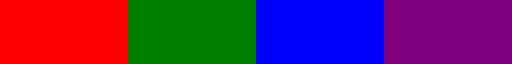

In [ ]:
ListedColormap(('red', 'green',"blue","purple"))

<ipython-input-17-6386e52c78b6>:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)


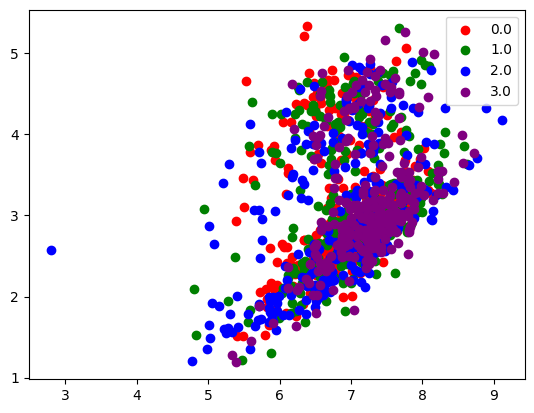

In [ ]:
from matplotlib.colors import ListedColormap
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)
plt.legend()
plt.show()

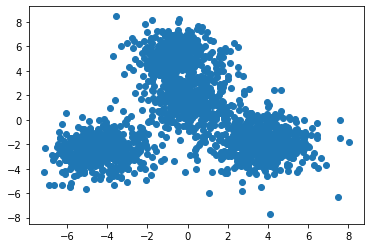

In [ ]:
plt.scatter(np.concatenate([X_train[:,0],X_test[:,0]]),np.concatenate([X_train[:,1],X_test[:,1]]))

# Principal Component Analysis (PCA)

#RANDOM FORREST




## Training the Random Forest Classification model on the Training set

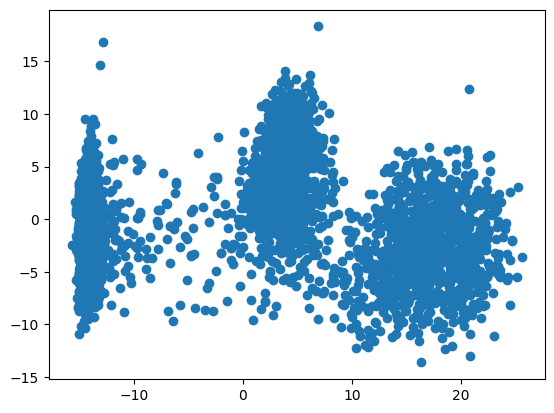

In [ ]:
plt.scatter(np.concatenate([X_train[:,0],X_test[:,0]]),np.concatenate([X_train[:,1],X_test[:,1]]))

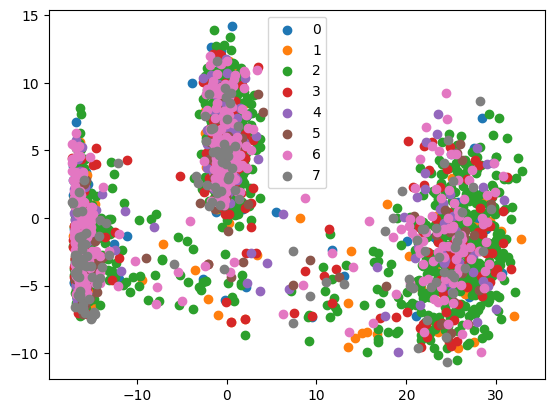

In [ ]:

from matplotlib.colors import ListedColormap
X_set,y_set=np.concatenate([X_train]),np.concatenate([y_train])
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =200, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

## Predicting a new result

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [2 2]
 [5 6]
 ...
 [3 3]
 [2 2]
 [2 2]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 26   0  15   0   0   0   2   0]
 [  0  24  27   3   2   0   2   0]
 [  3   0 502   6   0   1   1   0]
 [  1   2  39  70   0   0   2   0]
 [  0   1  19   0  34   0   4   0]
 [  0   0   9   4   3  24   1   0]
 [  3   4  45   2   3   2  68   0]
 [  0   2  13   3   1   0   0  16]]


0.7724974721941354

## Visualising the Training set results

<ipython-input-19-6ea2e16c394c>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], X_set[y_set == j,3], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)


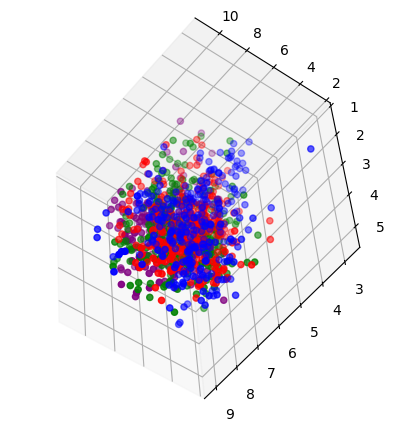

In [ ]:
from matplotlib.colors import ListedColormap
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X_set,y_set=X_train,y_train
for i, j in enumerate(np.unique(y_set)):
    ax.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], X_set[y_set == j,3], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)
    ax.view_init(elev=25., azim=120, roll=60)
plt.show()

<ipython-input-21-02869a179a92>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])


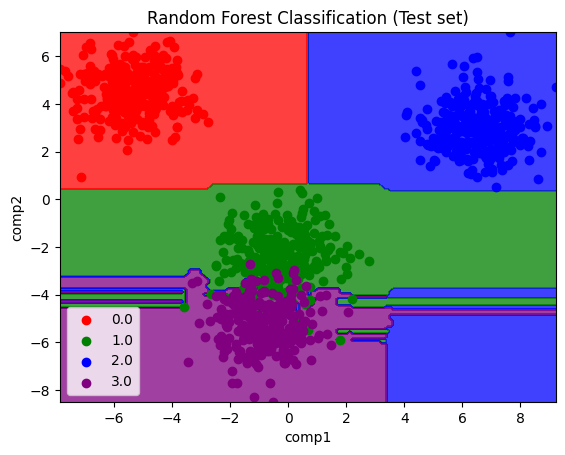

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max() , step = 0.1),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green',"blue","purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
labs=np.unique(y_test)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])
plt.title('Random Forest Classification (Test set)')
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.legend()
plt.show()

## Visualising the Test set results

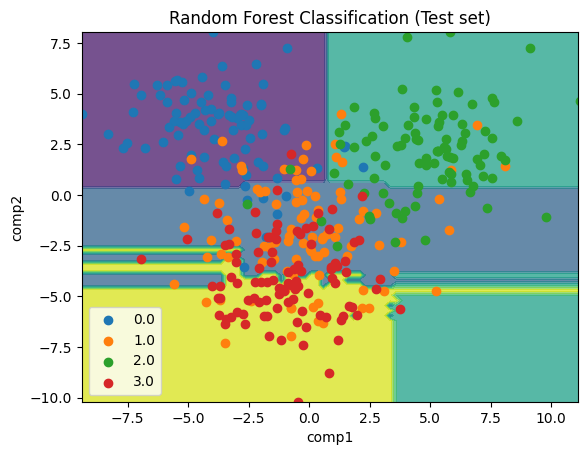

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max() , step = 0.25),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
labs=np.unique(y_test)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],  label = labs[i])
plt.title('Random Forest Classification (Test set)')
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.legend()
plt.show()

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

#SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel ="rbf"  )
classifier.fit(X_train, y_train)

SVC()

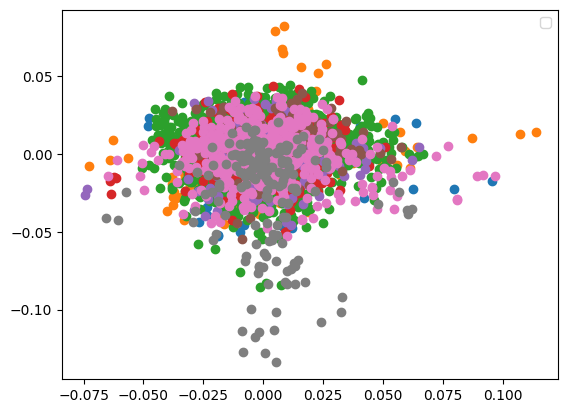

In [ ]:
for k,i in enumerate(np.unique(y_test)):
    plt.scatter(np.concatenate([X_train[y_train[:]==i,0],X_test[y_test[:]==i,0]]),np.concatenate([X_train[y_train[:]==i,1],X_test[y_test[:]==i,1]]))
    plt.legend()

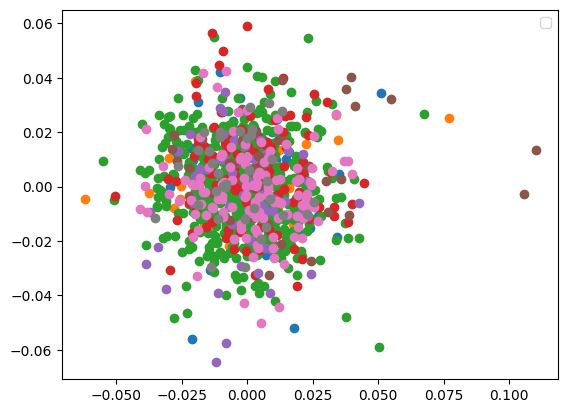

In [ ]:
for k,i in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test[:]==i,0],X_test[y_test[:]==i,1])
    plt.legend()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [2 2]
 [6 6]
 ...
 [3 3]
 [2 2]
 [2 2]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 35   0   5   0   0   0   3   0]
 [  0  46   6   1   3   0   2   0]
 [  0   0 511   0   0   0   2   0]
 [  0   3  19  91   0   0   1   0]
 [  0   1   4   0  48   0   5   0]
 [  0   0   4   3   0  33   1   0]
 [  2   4  17   0   2   0 102   0]
 [  0   2   1   3   0   0   1  28]]


0.9039433771486349

#Confusion matrix

In [ ]:
mx=[ {"TP":np.sum([[cm[i,j] if (j==k and i==j) else 0 for j in range(cm.shape[1]) ] for i in range(cm.shape[0])]),
   "TN":np.sum([[cm[i,j] if (j!=k and i!=k) else 0 for j in range(cm.shape[1]) ] for i in range(cm.shape[0])]),
   "FP":np.sum([[cm[i,j] if (j==k and i!=j) else 0 for j in range(cm.shape[1]) ] for i in range(cm.shape[0])]),
   "FN":np.sum([[cm[i,j] if (i==k and i!=j) else 0 for j in range(cm.shape[1]) ] for i in range(cm.shape[0])]),
   "N":np.sum([[cm[i,j] if (i==k ) else 0 for j in range(cm.shape[1]) ] for i in range(cm.shape[0])])
}
  for k in range(len(le.classes_))]

In [ ]:
np.sum([(mx[i]["TP"]/(mx[i]["TP"]+mx[i]["FN"]))*mx[i]["N"] for i,_ in enumerate(le.classes_)])/np.sum([mx[i]["N"] for i,_ in enumerate(le.classes_)])

0.9039433771486349

In [ ]:
np.mean([mx[i]["TP"]/(mx[i]["TP"]+mx[i]["FN"]) for i,_ in enumerate(le.classes_)])

0.8296272221477141

In [ ]:
np.mean([mx[i]["TN"]/(mx[i]["TN"]+mx[i]["FP"]) for i,_ in enumerate(le.classes_)])

0.979840709539901

<ipython-input-48-3ddca2c464f0>:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.linspace(0, 100, num=11))


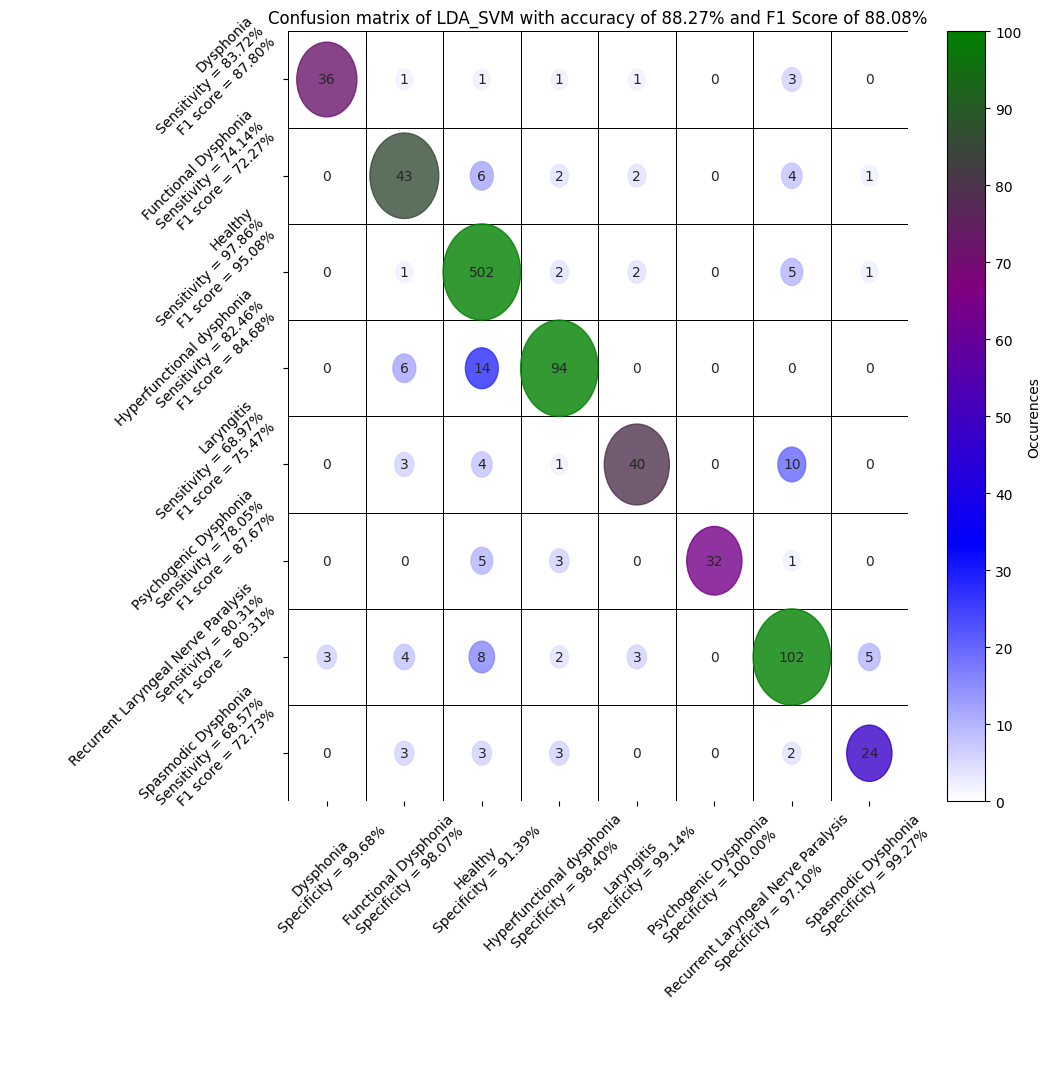

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
cmap = mcolors.LinearSegmentedColormap.from_list('custom_map', ['white', "blue","purple","green"  ])
plt.figure(figsize=(10, 10))


sns.heatmap(cm, annot=True, fmt=".0f", cbar=False,cmap="afmhot_r" ,vmax=100000,linecolor="black",linewidths=0.4,
            xticklabels=[m+"\nSpecificity = "+"{SPEC:.2f}%".format(SPEC=mx[i]["TN"]/(mx[i]["TN"]+mx[i]["FP"])*100) if i != 6
                         else m+"\nSpecificity = "+"{SPEC:.2f}%".format(SPEC=mx[i]["TN"]/(mx[i]["TN"]+mx[i]["FP"])*100)+"\n"*5
                         for i,m in enumerate(le.classes_)],
            yticklabels=[m+"\nSensitivity = "+"{SEN:.2f}%".format(SEN=mx[i]["TP"]/(mx[i]["TP"]+mx[i]["FN"])*100)+
                         "\nF1 score = {F1:.2f}%".format(F1=200*mx[i]["TP"]/(2*mx[i]["TP"]+mx[i]["FP"]+mx[i]["FN"])) if i != 6
                          else "\n"*5+m+"\nSensitivity = "+"{SEN:.2f}%".format(SEN=mx[i]["TP"]/(mx[i]["TP"]+mx[i]["FN"])*100)+
                         "\nF1 score = {F1:.2f}%".format(F1=200*mx[i]["TP"]/(2*mx[i]["TP"]+mx[i]["FP"]+mx[i]["FN"]))
                          for i,m in enumerate(le.classes_)])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Confusion matrix of LDA_SVM with accuracy of {accuracy:.2f}% and F1 Score of {F1:.2f}%".format(
    accuracy=(np.sum([mx[i]["TP"] for i,_ in enumerate(le.classes_)])/np.sum(cm)*100),
    F1=np.sum([2*mx[i]["TP"]/(2*mx[i]["TP"]+mx[i]["FP"]+mx[i]["FN"])*mx[i]["N"] for i,m in enumerate(le.classes_)])*100/np.sum([mx[i]["N"] for i,m in enumerate(le.classes_)])
    ))
# Normalize the data for circle sizes
max_val = np.max(cm)  # Set the maximum value for normalization and color scale
normalized_data = cm / 50
for i,n in enumerate(normalized_data):
  for j,m in enumerate(n):
    if m>=1:
      normalized_data[i,j]=1

# Overlay circles
for y in range(cm.shape[0]):
    for x in range(cm.shape[1]):
        size = normalized_data[y, x] * 0.4+0.1 # Adjust this factor to control the circle size
        color = cmap(normalized_data[y, x])  # Use the same colormap for color
        circle = plt.Circle((x + 0.5, y + 0.5), size, color=color, alpha=0.8)
        plt.gca().add_artist(circle)

# Add labels and show plot
# Replace 'le.classes_' with your actual class labels
norm = Normalize(vmin=0, vmax=100)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for the color bar

cbar = plt.colorbar(sm, ticks=np.linspace(0, 100, num=11))
cbar.ax.set_yticklabels([str(int(i)) for i in np.linspace(0, 100, num=11)])
cbar.set_label('Occurences')
plt.show()

NameError: name 'labs' is not defined

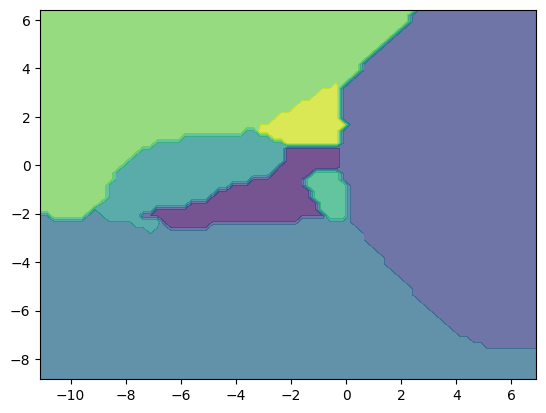

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],  label = labs[i])
plt.title('Kernel SVM (Training set)')
plt.xlabel('Comp2')
plt.ylabel('Comp1')
plt.legend()
plt.show()

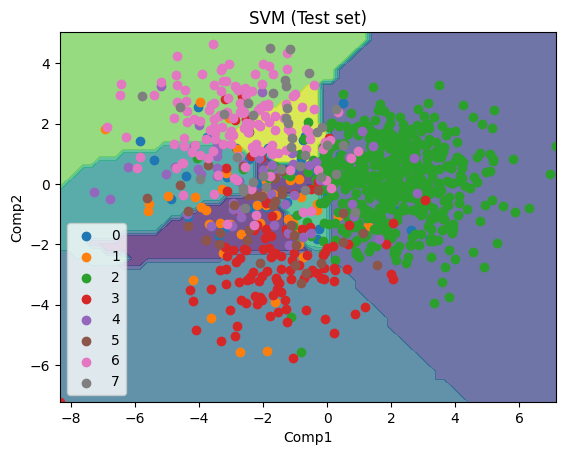

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())
labs=np.unique(y_test)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = labs[i])
plt.title('SVM (Test set)')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.legend()
plt.show()

#Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[77  9  3  2]
 [ 5 75 10  5]
 [ 1  0 92  2]
 [ 5  4  1 89]]


0.8763157894736842

## Visualising the Training set results

<ipython-input-27-c1adee37c3c9>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


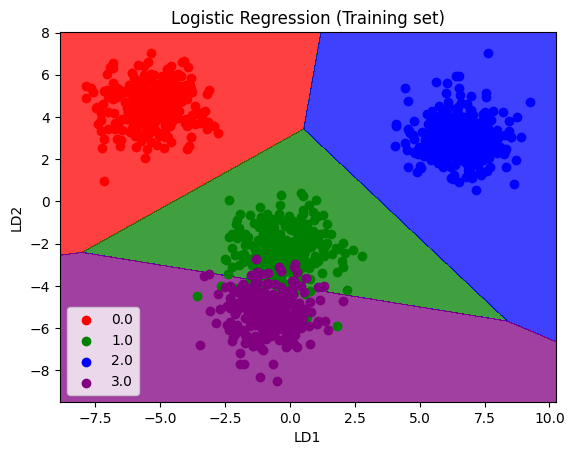

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue',"purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue',"purple"))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-28-de45a3719c0d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


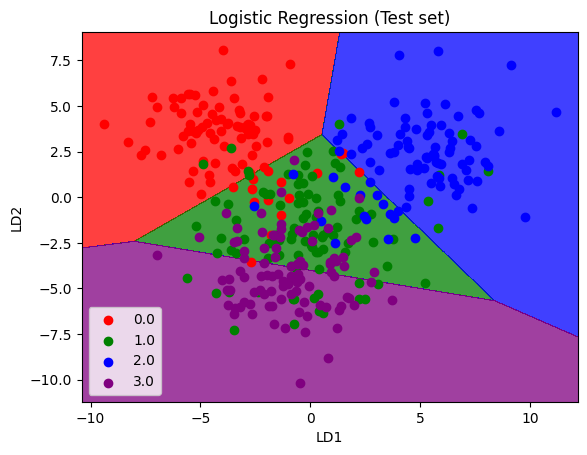

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue',"purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', "blue","purple"))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Training XGBoost on the Training set

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 24   1  15   0   0   0   3   0]
 [  0  32  20   2   2   0   2   0]
 [  2   2 496   4   1   4   3   1]
 [  2   5  29  74   0   0   4   0]
 [  0   2  15   1  34   0   6   0]
 [  0   0   7   4   3  26   0   1]
 [  4   4  27   0   3   1  84   4]
 [  0   2   3   3   1   0   1  25]]


0.8038422649140546

In [ ]:
y.reshape(-1,1)

array([[3.],
       [3.],
       [1.],
       ...,
       [1.],
       [1.],
       [2.]])

## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = np.concatenate([X_train,X_test]), y = np.concatenate([y_train,y_test]), cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.61 %
Standard Deviation: 4.49 %


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.53 %
Standard Deviation: 4.75 %


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Nueva sección

In [ ]:
X = np.concatenate([X_train,X_test])
y = np.concatenate([y_train,y_test])

In [ ]:
def model(l):
  import seaborn as sns
  from sklearn.preprocessing import StandardScaler
  from sklearn.decomposition import PCA
  from sklearn.svm import SVC
  from numpy import mean
  from numpy import std
  from sklearn.datasets import make_classification
  from sklearn.model_selection import cross_val_score,cross_validate
  from sklearn.model_selection import RepeatedStratifiedKFold
  from sklearn.pipeline import Pipeline
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
  from sklearn.linear_model import LogisticRegression
  # define dataset
  # define the pipeline
  steps = [("sc", StandardScaler()),('pca', PCA(n_components =l)), ('m', SVC(kernel="rbf"))]
  model = Pipeline(steps=steps)
  print(model[-1])
  # evaluate model
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  def confusion_matrix_scorer(clf, X, y):
      y_pred = clf.predict(X)
      cm = confusion_matrix(y, y_pred)
      return [cm]
  n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # report performance
  print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
  return(mean(n_scores))

In [ ]:
acc=[]
for i in range(2,100):
  o=model(i)
  print(o)
  acc.append(o)
plt.plot(acc)

SVC()
Accuracy: 0.308 (0.006)
0.3080932990475931
SVC()
Accuracy: 0.304 (0.010)
0.30415066627560916
SVC()
Accuracy: 0.414 (0.010)
0.4138668540104994
SVC()
Accuracy: 0.419 (0.012)
0.41903881700554535
SVC()
Accuracy: 0.441 (0.010)
0.44071204297994915
SVC()
Accuracy: 0.449 (0.013)
0.44858866888114357
SVC()
Accuracy: 0.525 (0.015)
0.525426013964391
SVC()
Accuracy: 0.551 (0.011)
0.5514088301696326
SVC()
Accuracy: 0.569 (0.014)
0.5685285096843575
SVC()
Accuracy: 0.571 (0.015)
0.5712349914626689
SVC()
Accuracy: 0.584 (0.018)
0.5842890369753975
SVC()
Accuracy: 0.613 (0.013)
0.6127346060891292
SVC()
Accuracy: 0.692 (0.021)
0.6917902931339849
SVC()
Accuracy: 0.724 (0.021)
0.7236814882012036
SVC()
Accuracy: 0.737 (0.014)
0.7371013543776842
SVC()
Accuracy: 0.753 (0.017)
0.7526165612857607
SVC()
Accuracy: 0.769 (0.020)
0.7692410528541516
SVC()
Accuracy: 0.784 (0.018)
0.7840191618182356
SVC()
Accuracy: 0.790 (0.017)
0.7902960896522089
SVC()
Accuracy: 0.803 (0.016)
0.8033474068566933
SVC()
Accuracy: 0

KeyboardInterrupt: 

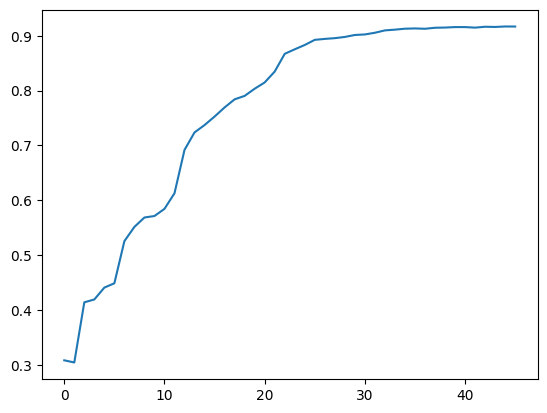

In [ ]:
plt.plot(acc)

In [ ]:
cross_val_score(model,X,y, scoring=confusion_matrix_scorer,cv=cv, n_jobs=-1)

ValueError: scoring must return a number, got [array([[ 70,   4,   5,   0,   3],
       [  1, 278,   7,   0,   0],
       [  5,   8, 179,   0,   3],
       [  0,   2,   1,  28,   2],
       [  3,   5,   4,   1,  68]])] (<class 'list'>) instead. (scorer=score)

In [ ]:
cv_results

[{'fit_time': array([3.7857182 , 2.17646432, 2.05965877, 1.91290879, 1.77103114]),
  'score_time': array([1.08408976, 1.03502512, 1.01125288, 1.02699304, 0.99707651]),
  'test_tn': array([47, 52, 51, 48, 38]),
  'test_fp': array([18,  8, 14, 14, 19]),
  'test_fn': array([0, 0, 0, 1, 1]),
  'test_tp': array([286, 286, 287, 280, 268])}]

In [ ]:
sns.heatmap(cv_results[0], annot=True)

KeyError: 0

#SVD

In [ ]:
X=np.row_stack([X_train,X_test])
y=np.row_stack([y_train.reshape(-1,1),y_test.reshape(-1,1)])

In [ ]:
from sklearn.decomposition import TruncatedSVD
tr=TruncatedSVD(n_components=87)
X_train=tr.fit_transform(X_train,y_train)
X_test=tr.transform(X_test)

In [ ]:
# evaluate svd with logistic regression algorithm for classification
from sklearn.preprocessing import StandardScaler
from numpy import mean
from sklearn.svm import SVC
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
# define the pipeline
steps = [("sc", StandardScaler()),('svd', TruncatedSVD(n_components=60)), ('m', SVC(kernel="rbf"))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.938 (0.006)


In [ ]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from sklearn.preprocessing import StandardScaler
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
# define the pipeline
steps = [("sc", StandardScaler()),('pca', PCA(n_components=40)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.937 (0.013)


In [ ]:
# evaluate lle and logistic regression for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# define dataset
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=2)), ('m', SVC(kernel ="rbf"  ))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: nan (nan)


c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_locally_linear.py", line 177, in null_space
    eigen_values, eigen_vectors = eigsh(
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py", line 1651, in eigsh
    Minv_matvec = get_OPinv_matvec(A, M, sigma,
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-pac

In [ ]:
# evaluate modified lle and logistic regression for classification
from sklearn.preprocessing import StandardScaler
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# define dataset
# define the pipeline


steps = [("sc", StandardScaler()),('lltsa', LocallyLinearEmbedding(n_components=3, method='standard', n_neighbors=5)), ('m', SVC(kernel ="rbf"  ))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.518 (0.001)
